### 🌦️ Problem Statement: Weather Type Classification

🧩 **Context**:
Understanding and classifying weather conditions is crucial for sectors such as agriculture, transportation, tourism, and disaster preparedness. By analyzing various atmospheric and environmental parameters, we can categorize weather into types like **Rainy**, **Sunny**, **Cloudy**, or **Snowy**. This project simulates such a scenario using a synthetic dataset that includes realistic and extreme values, offering a robust platform for practicing classification, outlier detection, and data preprocessing.

---

### 🎯 **Objective**:

To build a machine learning model that classifies the **type of weather** (Rainy, Sunny, Cloudy, or Snowy) based on environmental and atmospheric features.

The target is the `Weather Type` column, which includes:

* `'Rainy'`
* `'Sunny'`
* `'Cloudy'`
* `'Snowy'`

---

### 📊 **Dataset Description**:

| Feature              | Type        | Description                                                                      |
| -------------------- | ----------- | -------------------------------------------------------------------------------- |
| Temperature          | Float       | Air temperature in degrees Celsius; includes both cold and hot extremes.         |
| Humidity             | Float       | Relative humidity in percentage; includes values over 100% to simulate outliers. |
| Wind Speed           | Float       | Wind speed in km/h; includes unusually high values to test model robustness.     |
| Precipitation (%)    | Float       | Amount of precipitation as a percentage.                                         |
| Cloud Cover          | Categorical | Description of cloud coverage (e.g., Clear, Partial, Overcast).                  |
| Atmospheric Pressure | Float       | Atmospheric pressure in hPa; values vary widely.                                 |
| UV Index             | Float       | Ultraviolet radiation level on a scale (e.g., 0–11+).                            |
| Season               | Categorical | Season when the data was recorded (e.g., Summer, Winter).                        |
| Visibility (km)      | Float       | Distance visible in kilometers; includes very low or very high values.           |
| Location             | Categorical | Type of location (e.g., Urban, Rural, Coastal, Mountain).                        |
| Weather Type         | Categorical | 🔍 **Target variable** – Type of weather to predict.                             |

---

### 🛠️ **Approach**:

#### 🔹 **Data Preprocessing**:

* Encode categorical features like `Cloud Cover`, `Season`, `Location`, and `Weather Type`.
* Scale numerical features like `Temperature`, `Humidity`, `Wind Speed`, etc.
* Detect and handle **outliers**.
* Handle **missing values** if present.

#### 🔹 **Model Training**:

* Train classification models such as:

  * K-Nearest Neighbors (KNN)
* Tune hyperparameters using cross-validation.

#### 🔹 **Model Evaluation**:

* Use metrics like:

  * Accuracy
  * Precision
  * Recall
  * F1-score
  * Confusion Matrix

#### 🔹 **(Optional) Deployment**:

* Build a **web app using Streamlit**:

  * Allow users to input weather conditions.
  * Show predicted weather type dynamically.




## Import The Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification,make_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import optuna
from optuna.samplers import GridSampler,RandomSampler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,classification_report,log_loss,roc_auc_score

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
weather_data = pd.read_csv("weather_classification_data.csv")

## Inspect The Dataset

In [7]:
weather_data.head(n=10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [8]:
weather_data.tail(n=10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13190,30.0,24,3.5,16.0,partly cloudy,1017.54,11,Summer,6.5,mountain,Sunny
13191,27.0,48,6.5,14.0,clear,1029.37,8,Summer,8.0,inland,Sunny
13192,31.0,24,8.0,5.0,clear,1029.61,8,Summer,9.0,inland,Sunny
13193,-5.0,65,15.5,50.0,overcast,982.57,1,Winter,5.0,inland,Snowy
13194,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [9]:
weather_data.shape

(13200, 11)

13200 rows → Each row represents a unique weather observation or data entry.

11 columns → Each column is a feature or variable (including the target).

In [11]:
weather_data.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

| Column                 | Type    | Insight                                                                                                                      |
| ---------------------- | ------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `Temperature`          | float64 | Continuous numerical variable. Needs **scaling**; may contain outliers (e.g., extreme temperatures).                         |
| `Humidity`             | int64   | Discrete numerical; though it’s a percentage, treat it as continuous. May contain **values > 100%**, which are **outliers**. |
| `Wind Speed`           | float64 | Continuous. Needs **scaling**; check for **unrealistic high values**.                                                        |
| `Precipitation (%)`    | float64 | Percentage. Outliers may exist, so visualize the **distribution**.                                                           |
| `Cloud Cover`          | object  | Categorical (e.g., Clear, Overcast). Requires **label encoding or one-hot encoding**.                                        |
| `Atmospheric Pressure` | float64 | Continuous. Check for **range and variance**; may require **normalization**.                                                 |
| `UV Index`             | int64   | Ordinal or continuous. Usually 0–11+, so treat as numerical but check for extremes.                                          |
| `Season`               | object  | Categorical (e.g., Winter, Summer). Requires **encoding** (ordinal if there's order, otherwise one-hot).                     |
| `Visibility (km)`      | float64 | Continuous. May include **very low/high values**; use for outlier detection.                                                 |
| `Location`             | object  | Categorical (e.g., Urban, Rural). **Encode** it; can be insightful for model performance.                                    |
| `Weather Type`         | object  | ✅ **Target variable** (Sunny, Rainy, Cloudy, Snowy). Multiclass classification problem.                                      |


In [13]:
#check the null values
weather_data.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

All columns have zero null values, indicating the dataset is complete and does not require any imputation or missing value handling.

In [15]:
#check For The Duplicates
weather_data.duplicated().value_counts()

False    13200
Name: count, dtype: int64

No duplicate rows were found in the dataset.

In [17]:
# Find The Duplicate Rows
weather_data[weather_data.duplicated()]

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type


In [18]:
weather_data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


| Feature                  | Key Insights                                                                                                                                                                                                                          |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Temperature**          | 🔥 Ranges from **-25°C** to a very high **109°C**, which suggests **extreme outliers** on the higher side. The **mean (19.1°C)** and **median (21°C)** are reasonable, but the **std dev (17.38)** is high, indicating high variance. |
| **Humidity**             | 💧 Min is **20%**, max is **109%** (⚠️ >100% is unrealistic), so outliers exist. Median is **70%**, and the distribution is slightly **right-skewed**.                                                                                |
| **Wind Speed**           | 🌬️ Values from **0 to 48.5 km/h** with **mean ≈ 9.8 km/h**. Very high max value indicates possible **outliers**.                                                                                                                     |
| **Precipitation (%)**    | 🌧️ Ranges from **0% to 109%**, which again includes **invalid (outlier) values** beyond 100%. Distribution is **spread out** (std dev ≈ 31.9), so check for **extreme rainfall entries**.                                            |
| **Atmospheric Pressure** | 🌡️ Min is **800.12 hPa**, max is **1199.21 hPa** — natural pressure ranges are \~870–1080 hPa → this also has **extreme outliers**. Mean is around **1005 hPa**, which is normal.                                                    |
| **UV Index**             | ☀️ Ranges from **0 to 14**, while **natural scale** is 0–11+; values >11 are **outliers**. Median is 3, and the mean is \~4. Distribution is **right-skewed**.                                                                        |
| **Visibility (km)**      | 👀 Varies from **0 to 20 km** with **mean ≈ 5.5 km**. Possible very foggy days or outliers with zero visibility. May require **binning or scaling**.                                                                                  |


In [20]:
weather_data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [21]:
cat_cols = weather_data.select_dtypes(include='object')
for i in cat_cols:
    print(f"unique category columns: {i} - {cat_cols[i].unique()}")
    print(f"unique category columns: {i} - {cat_cols[i].nunique()}")

unique category columns: Cloud Cover - ['partly cloudy' 'clear' 'overcast' 'cloudy']
unique category columns: Cloud Cover - 4
unique category columns: Season - ['Winter' 'Spring' 'Summer' 'Autumn']
unique category columns: Season - 4
unique category columns: Location - ['inland' 'mountain' 'coastal']
unique category columns: Location - 3
unique category columns: Weather Type - ['Rainy' 'Cloudy' 'Sunny' 'Snowy']
unique category columns: Weather Type - 4


In [22]:
for i in weather_data.select_dtypes(include='object'):
    print(f"value counts for the category columns: {i} - {cat_cols[i].value_counts()}\n")

value counts for the category columns: Cloud Cover - Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

value counts for the category columns: Season - Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

value counts for the category columns: Location - Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

value counts for the category columns: Weather Type - Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64



The target column Weather Type is perfectly balanced, with 3300 records for each of the four classes: Rainy, Cloudy, Sunny, and Snowy.


This ensures no class imbalance, making it ideal for training classification models without bias toward any category.

<Axes: xlabel='Weather Type', ylabel='count'>

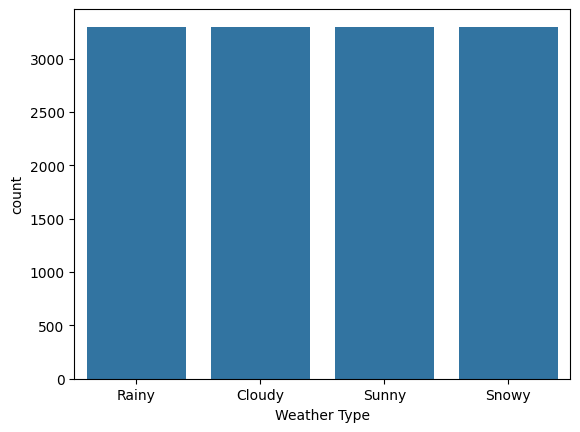

In [24]:
sns.countplot(x=weather_data['Weather Type'])

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Cloud Cover', ylabel='count'>

Text(0.5, 1.0, 'Countplot for Cloud Cover')

([0, 1, 2, 3],
 [Text(0, 0, 'partly cloudy'),
  Text(1, 0, 'clear'),
  Text(2, 0, 'overcast'),
  Text(3, 0, 'cloudy')])

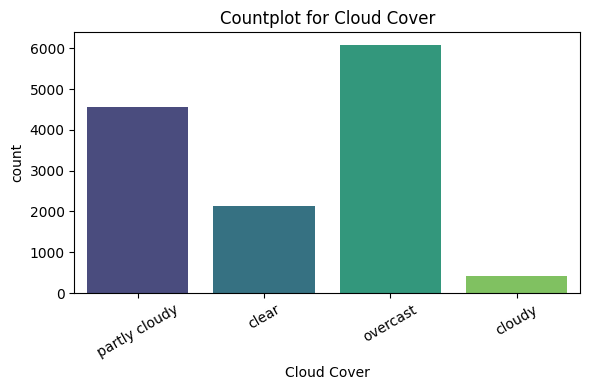

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Season', ylabel='count'>

Text(0.5, 1.0, 'Countplot for Season')

([0, 1, 2, 3],
 [Text(0, 0, 'Winter'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Autumn')])

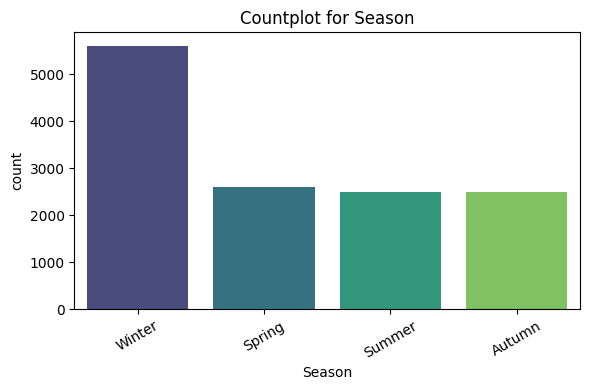

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Location', ylabel='count'>

Text(0.5, 1.0, 'Countplot for Location')

([0, 1, 2],
 [Text(0, 0, 'inland'), Text(1, 0, 'mountain'), Text(2, 0, 'coastal')])

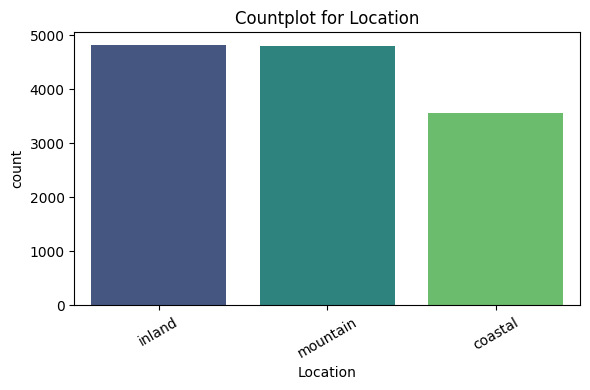

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Weather Type', ylabel='count'>

Text(0.5, 1.0, 'Countplot for Weather Type')

([0, 1, 2, 3],
 [Text(0, 0, 'Rainy'),
  Text(1, 0, 'Cloudy'),
  Text(2, 0, 'Sunny'),
  Text(3, 0, 'Snowy')])

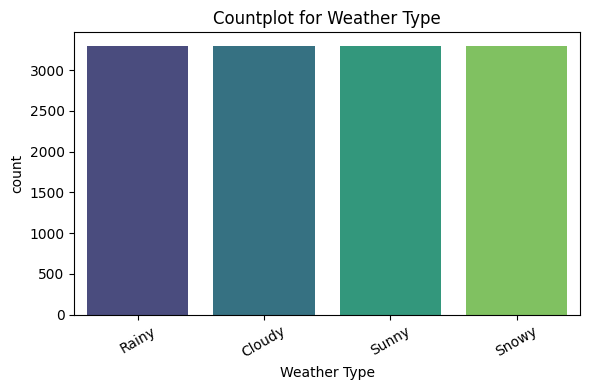

In [25]:
#count plot for all the categorical columns

for col in weather_data.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=weather_data, palette='viridis')
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show();

## Based on my dataset, the target class label Weather Type is perfectly balanced, with each category — Rainy, Sunny, Cloudy, and Snowy — having 3300 instances."

| Weather Type | Count |
| ------------ | ----- |
| Rainy        | 3300  |
| Sunny        | 3300  |
| Cloudy       | 3300  |
| Snowy        | 3300  |


In [27]:
weather_data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

## Univariate Analysis

### Univariate Analysis for Numerical Columns

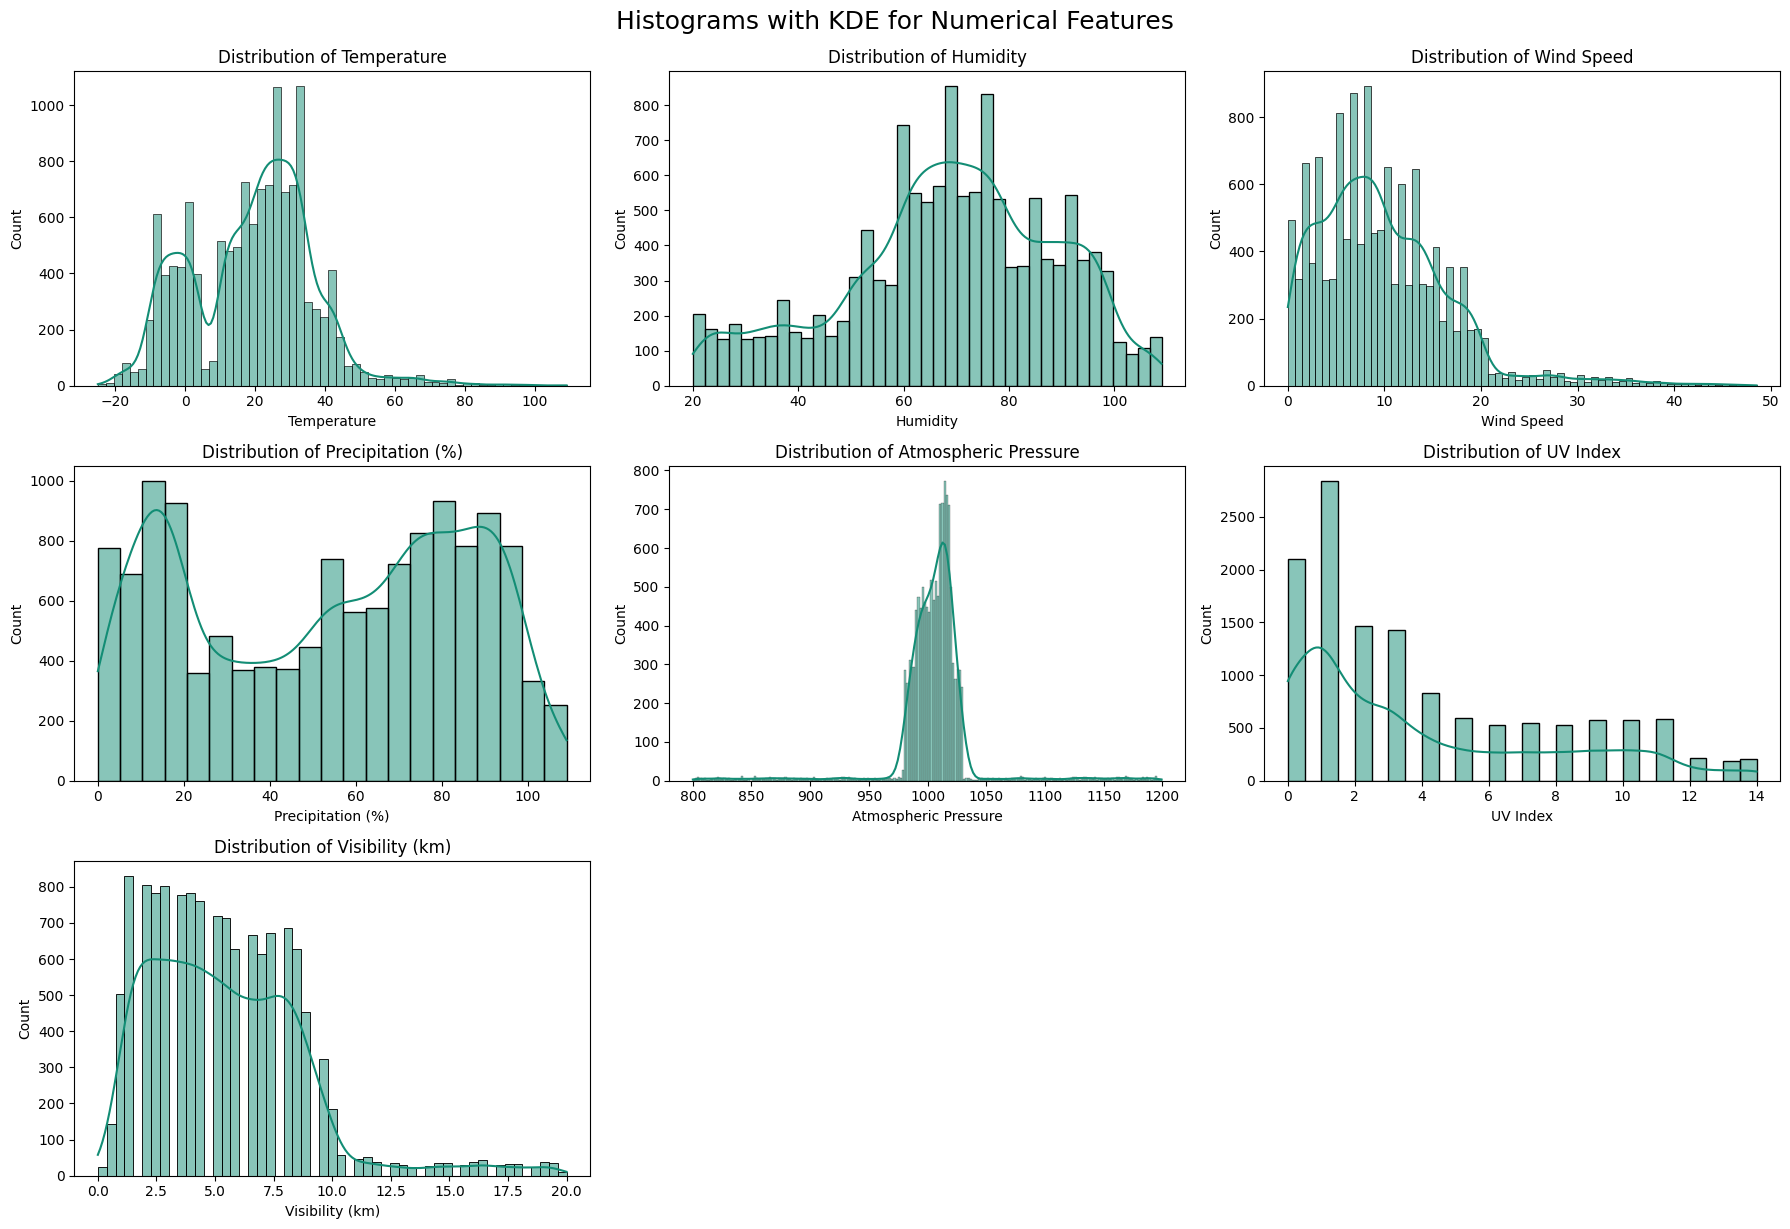

In [29]:
numerical_cols = weather_data.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(18, 12))
for i, col in enumerate(iterable=numerical_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(weather_data[col], kde=True, color='#138d75')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Histograms with KDE for Numerical Features', fontsize=18, y=1.02)
plt.show();

### Univariate Analysis for Categorical Columns

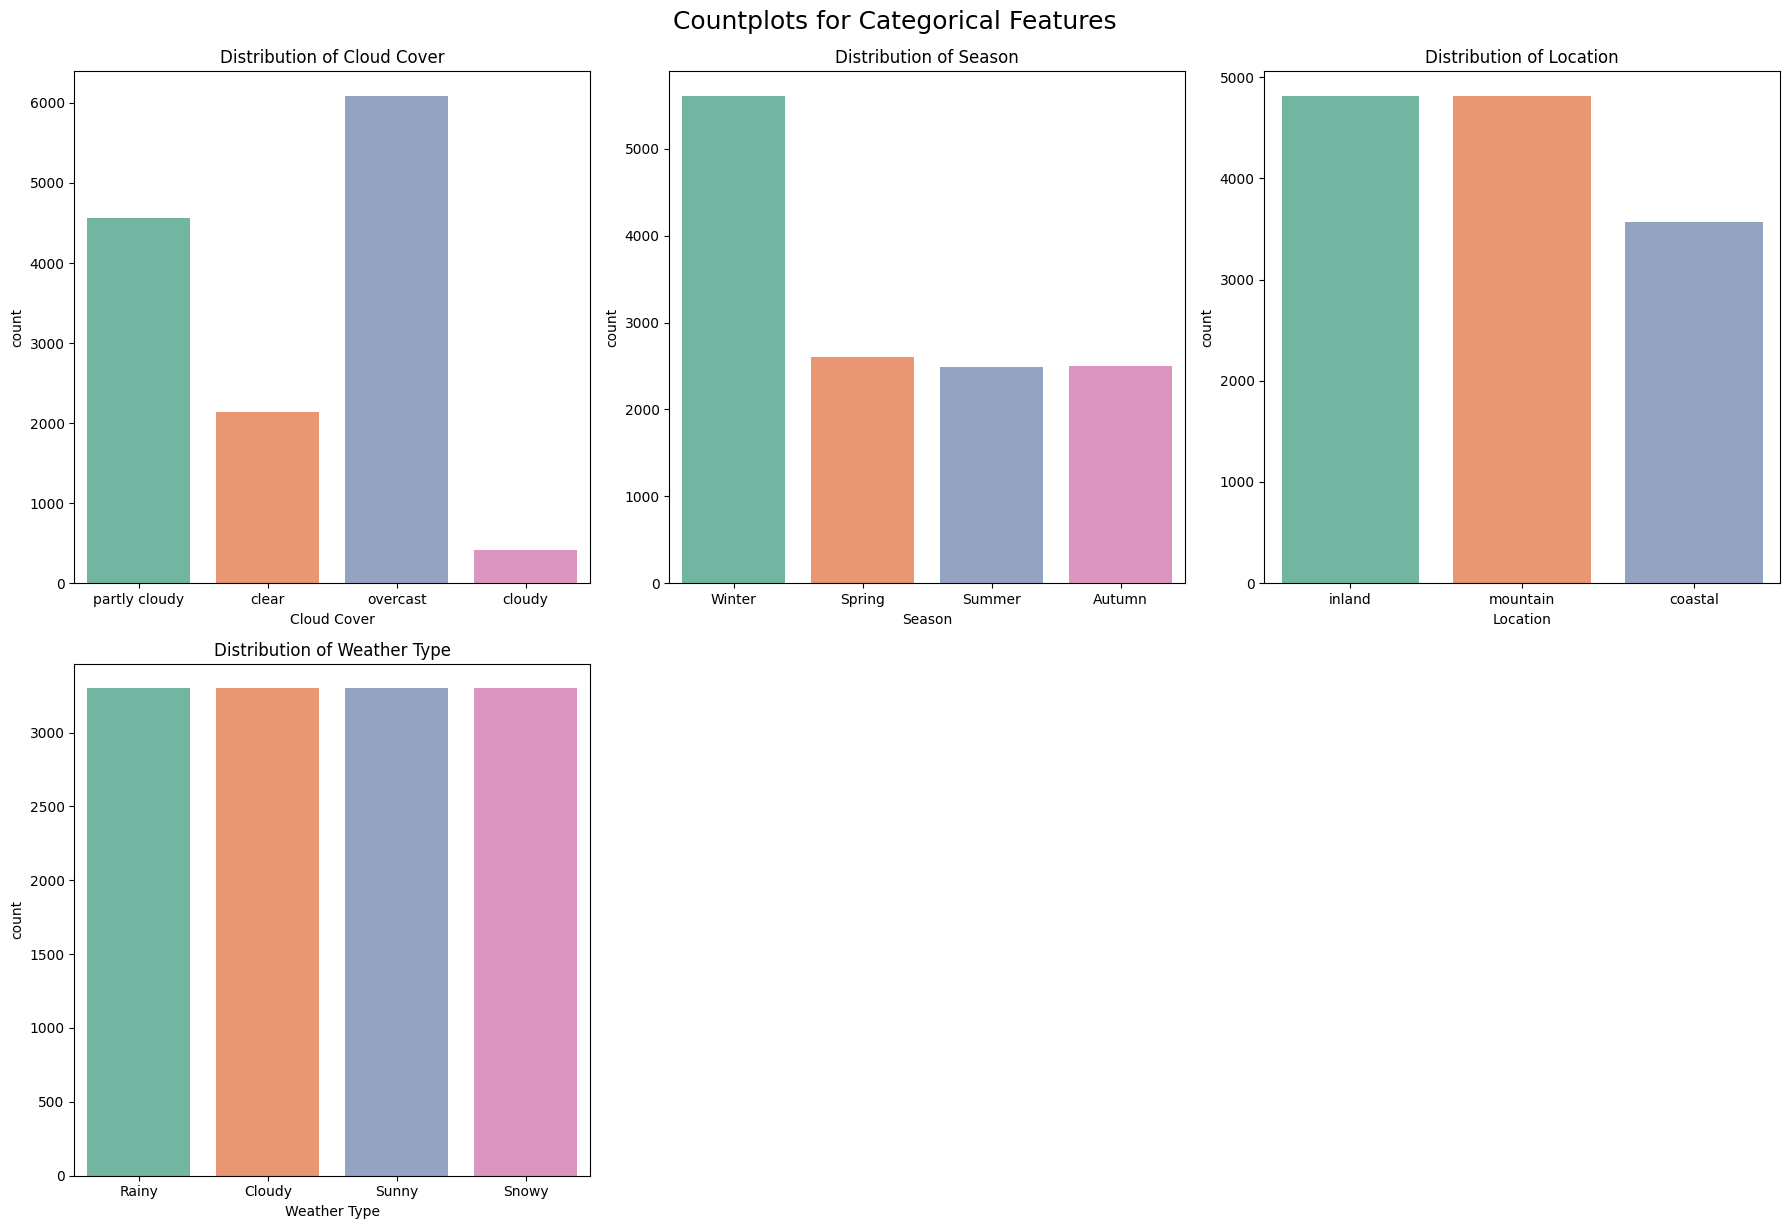

In [31]:
object_cols = weather_data.select_dtypes(include=['object']).columns
n_cols = 3
n_rows = (len(object_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(18, 12))
for i, col in enumerate(object_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=weather_data, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Countplots for Categorical Features', fontsize=18, y=1.02)
plt.show();

## Bivariate Analysis

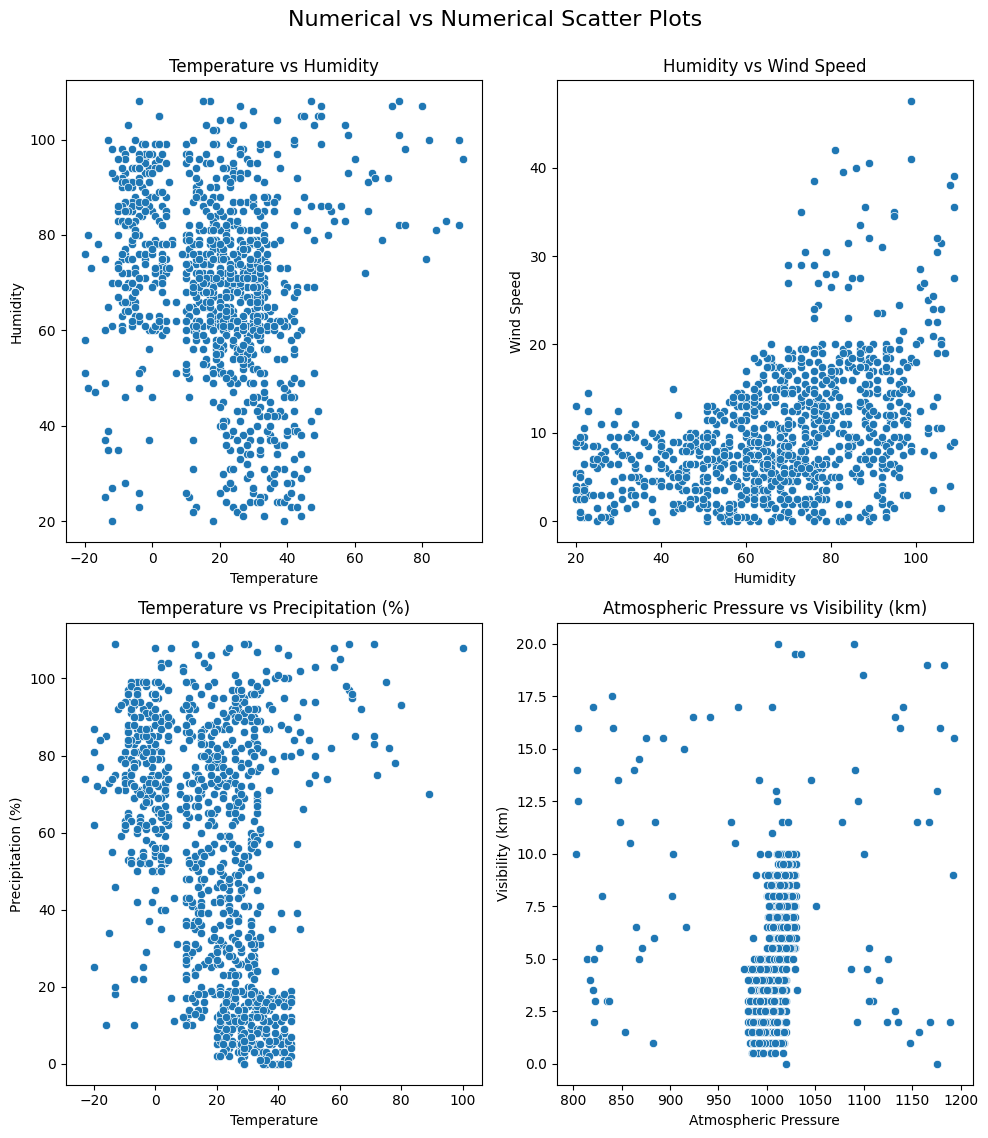

In [33]:
#numerical vs numerical
plt.figure(figsize=(10, 11))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Temperature', y='Humidity', data=weather_data.sample(1000))
plt.title('Temperature vs Humidity')
plt.subplot(2, 2, 2)
sns.scatterplot(x='Humidity', y='Wind Speed', data=weather_data.sample(1000))
plt.title("Humidity vs Wind Speed")
plt.subplot(2, 2, 3)
sns.scatterplot(x='Temperature', y='Precipitation (%)', data=weather_data.sample(1000))
plt.title("Temperature vs Precipitation (%)")
plt.subplot(2, 2, 4)
sns.scatterplot(x='Atmospheric Pressure', y='Visibility (km)', data=weather_data.sample(1000))
plt.title("Atmospheric Pressure vs Visibility (km)")
plt.tight_layout()
plt.suptitle('Numerical vs Numerical Scatter Plots', fontsize=16, y=1.03)
plt.show();

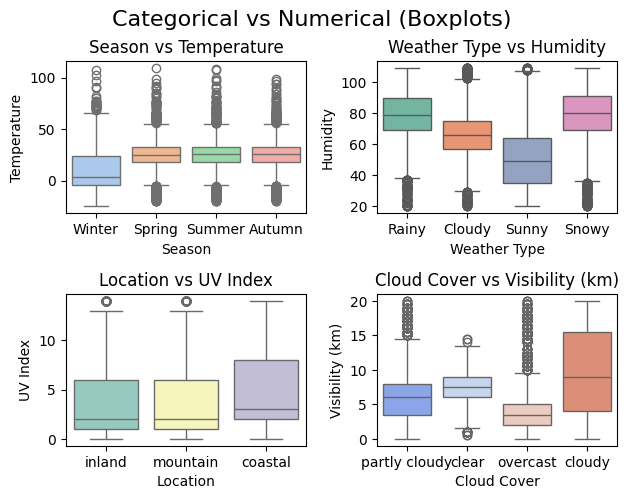

In [34]:
#Categorical vs Numerical
plt.subplot(2, 2, 1)
sns.boxplot(x='Season', y='Temperature', data=weather_data, palette='pastel')
plt.title('Season vs Temperature')
plt.subplot(2, 2, 2)
sns.boxplot(x='Weather Type', y='Humidity', data=weather_data, palette='Set2')
plt.title('Weather Type vs Humidity')
plt.subplot(2, 2, 3)
sns.boxplot(x='Location', y='UV Index', data=weather_data, palette='Set3')
plt.title('Location vs UV Index')
plt.subplot(2, 2, 4)
sns.boxplot(x='Cloud Cover', y='Visibility (km)', data=weather_data, palette='coolwarm')
plt.title('Cloud Cover vs Visibility (km)')
plt.tight_layout()
plt.suptitle('Categorical vs Numerical (Boxplots)', fontsize=16, y=1.03)
plt.show();

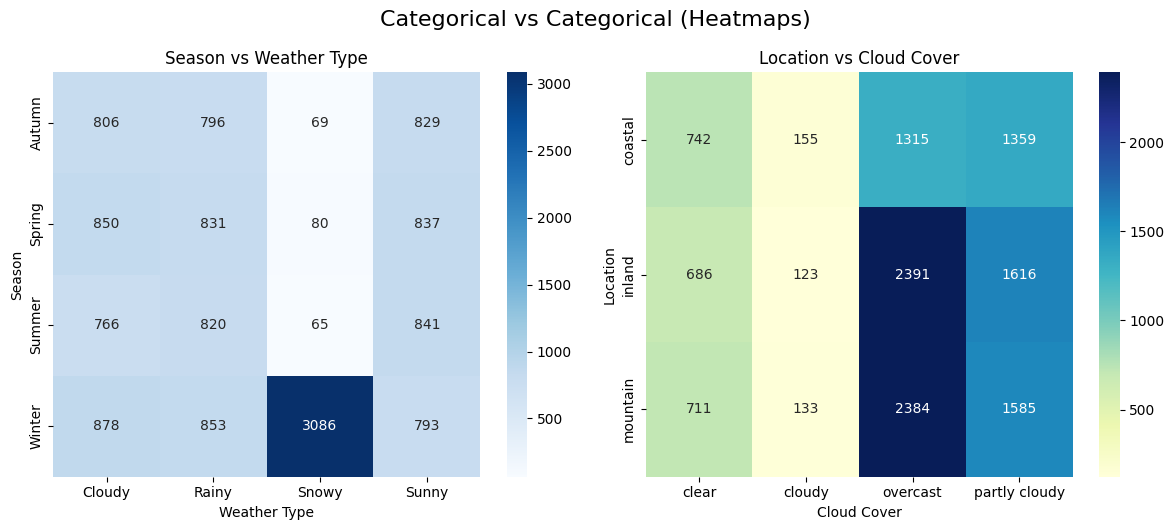

In [35]:
#Categorical vs Categorical
season_weather = pd.crosstab(weather_data['Season'], weather_data['Weather Type'])
location_cloud = pd.crosstab(weather_data['Location'], weather_data['Cloud Cover'])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(season_weather, annot=True, cmap='Blues', fmt='d')
plt.title('Season vs Weather Type')
plt.subplot(1, 2, 2)
sns.heatmap(location_cloud, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Location vs Cloud Cover')
plt.tight_layout()
plt.suptitle('Categorical vs Categorical (Heatmaps)', fontsize=16, y=1.05)
plt.show();

In [36]:
weather_data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

### Check for presence of Outliers in Numerical columns

In [38]:
weather_data.select_dtypes(include='number').columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [39]:
# to identify the presence of outliers, check the skewness value for each numerical column 
weather_data.skew(numeric_only=True)

Temperature             0.221741
Humidity               -0.401614
Wind Speed              1.360263
Precipitation (%)      -0.152457
Atmospheric Pressure   -0.293899
UV Index                0.900010
Visibility (km)         1.233275
dtype: float64

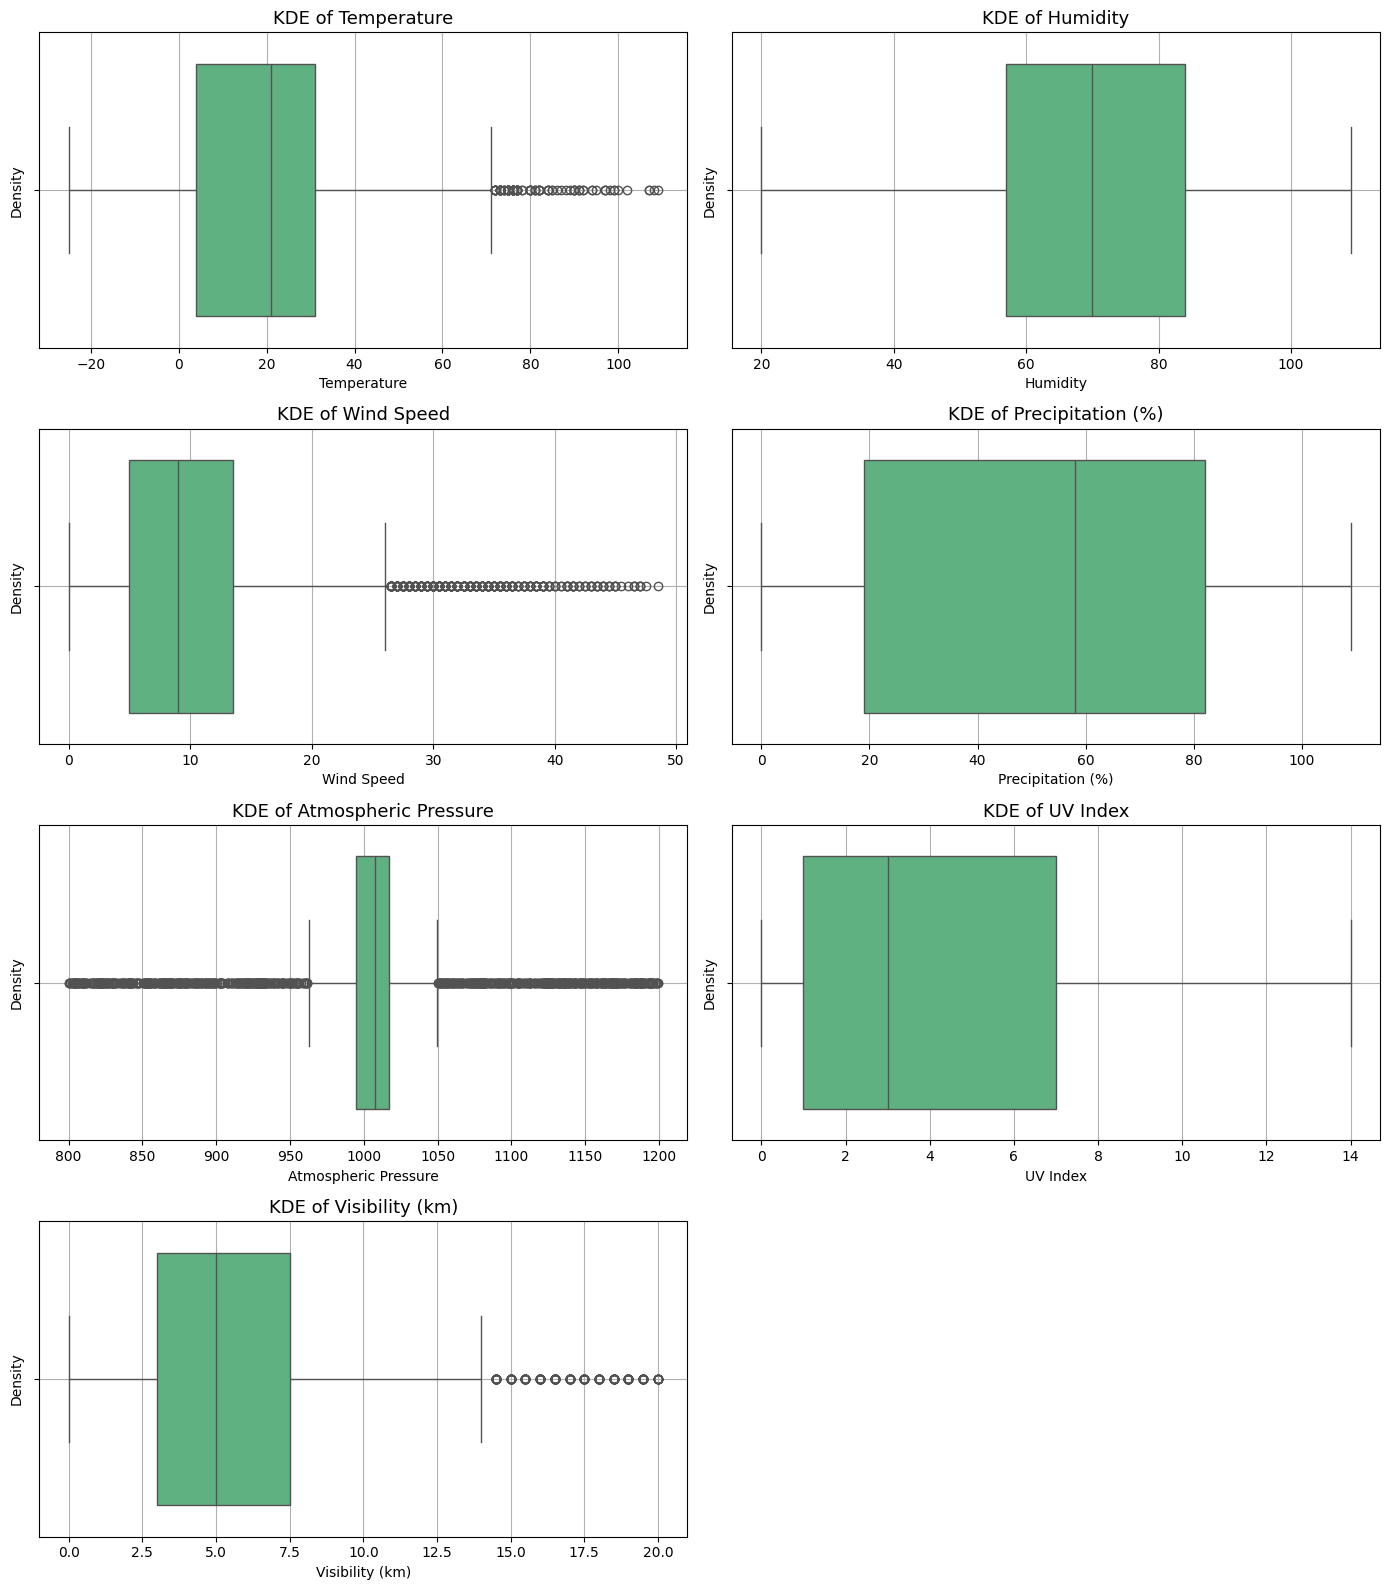

In [40]:
numerical_cols = weather_data.select_dtypes(include='number').columns

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x =weather_data[col],  color='#52be80')
    plt.title(f"KDE of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)

plt.tight_layout()
plt.show();

In [41]:
# Two approaches to get the outliers in the data
# IQR method
# Standard deviation method

In [42]:
# 1. Get the Outlier rows based on IQR method
q1,q2,q3 = weather_data['Wind Speed'].quantile(q=[0.25,0.5,0.75])
iqr = q3-q1
ub= q3+1.5*iqr
lb = q1-1.5*iqr

In [43]:
q1,q2,q3,iqr,ub,lb

(5.0, 9.0, 13.5, 8.5, 26.25, -7.75)

In [44]:
# Extract the outlier rows using ub & lb 

weather_data[(weather_data['Wind Speed']<lb) | (weather_data['Wind Speed']>ub)].shape

weather_data[(weather_data['Wind Speed']<lb) | (weather_data['Wind Speed']>ub)]

(404, 11)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
63,3.0,75,46.5,87.0,overcast,996.85,5,Winter,4.5,inland,Snowy
90,15.0,81,28.5,71.0,partly cloudy,1008.00,4,Winter,6.0,inland,Cloudy
123,-3.0,92,28.0,99.0,partly cloudy,987.70,1,Winter,4.5,mountain,Snowy
208,34.0,99,34.0,74.0,partly cloudy,1016.03,9,Autumn,1.0,inland,Rainy
228,73.0,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
12999,-2.0,90,28.5,84.0,overcast,992.14,14,Winter,4.5,mountain,Snowy
13066,5.0,102,31.0,108.0,partly cloudy,1005.89,10,Summer,2.0,inland,Rainy
13113,42.0,106,32.5,103.0,partly cloudy,996.45,14,Spring,1.0,mountain,Rainy
13115,40.0,75,26.5,78.0,partly cloudy,1011.36,0,Spring,4.5,mountain,Cloudy


In [45]:
round((weather_data[(weather_data['Wind Speed']<lb) | (weather_data['Wind Speed']>ub)].shape[0]/len(weather_data))*100,2)

3.06

In [46]:
# Observation:
# 3.06% of observations are identified as outliers based on IQR method

In [47]:
# 2. Get the Outlier rows based on Std Dev method
mu = weather_data['Wind Speed'].mean() 
sd = weather_data['Wind Speed'].std() 
UL = mu+2*sd 
LL = mu-2*sd 
print(mu, sd, UL, LL, sep = "\n")

9.83219696969697
6.908704141531314
23.6496052527596
-3.9852113133656584


In [48]:
# Extract the outlier rows using ub & lb 

weather_data[(weather_data['Wind Speed']<LL) | (weather_data['Wind Speed']>UL)].shape

weather_data[(weather_data['Wind Speed']<LL) | (weather_data['Wind Speed']>UL)].head() 

(498, 11)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
36,11.0,90,25.5,76.0,partly cloudy,996.17,0,Winter,1.0,mountain,Rainy
63,3.0,75,46.5,87.0,overcast,996.85,5,Winter,4.5,inland,Snowy
90,15.0,81,28.5,71.0,partly cloudy,1008.00,4,Winter,6.0,inland,Cloudy
123,-3.0,92,28.0,99.0,partly cloudy,987.70,1,Winter,4.5,mountain,Snowy
208,34.0,99,34.0,74.0,partly cloudy,1016.03,9,Autumn,1.0,inland,Rainy


In [49]:
round((weather_data[(weather_data['Wind Speed']<LL) | (weather_data['Wind Speed']>UL)].shape[0]/len(weather_data))*100,2)

3.77

In [50]:
# Observation:
# 3.77% of observations are identified as outliers based on std dev method

In [51]:
# Exclude: IQR based approach 
weather_data[weather_data['Wind Speed'] < ub]["Wind Speed"].skew() 

# Exclude: Std Dev based approach 
weather_data[weather_data['Wind Speed'] < UL]["Wind Speed"].skew()


0.4164479461338174

0.3318521671583118

### We will proceed with STD DEV based outlier handling approach as it is reducing the skewness in a better way compared to the IQR approach. 

In [53]:
weather_data1 = weather_data.copy()
weather_data1['Wind Speed'] = weather_data1['Wind Speed'].clip(lower=lb, upper=ub)

In [54]:
weather_data1.skew(numeric_only=True)

Temperature             0.221741
Humidity               -0.401614
Wind Speed              0.677507
Precipitation (%)      -0.152457
Atmospheric Pressure   -0.293899
UV Index                0.900010
Visibility (km)         1.233275
dtype: float64

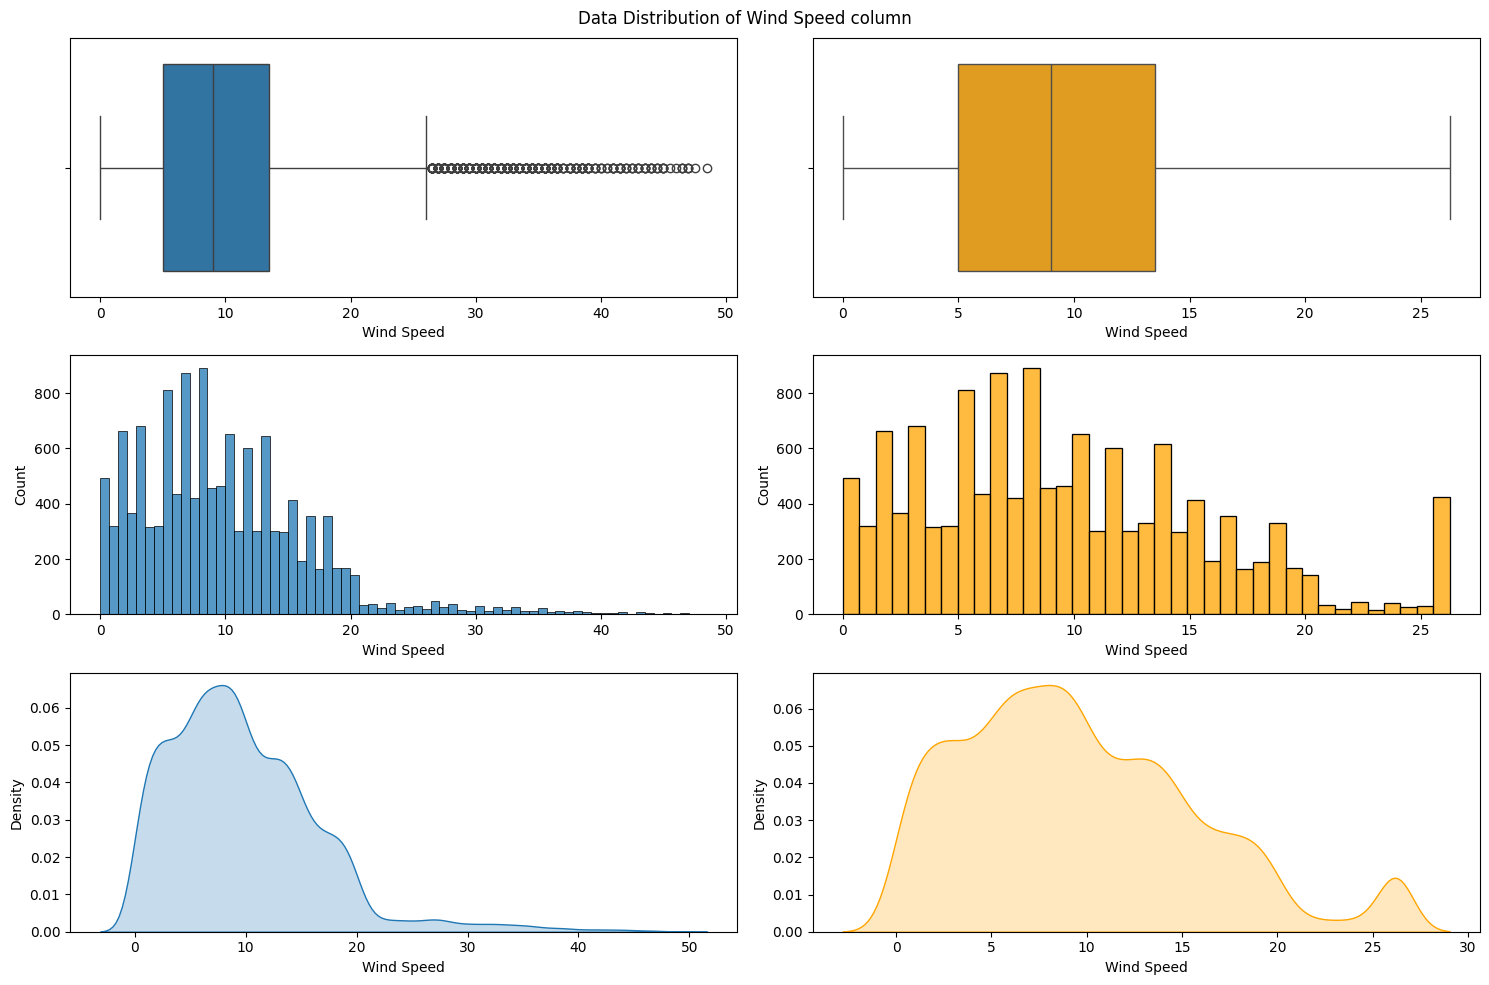

In [55]:
plt.figure(figsize=(15,10))
plt.suptitle("Data Distribution of Wind Speed column")

# ---With outliers---
# 1. Box plot 
plt.subplot(321)
sns.boxplot(data=weather_data, x = "Wind Speed")
#2. Histogram 
plt.subplot(323) 
sns.histplot(data=weather_data, x = "Wind Speed")
#3. KDE plot 
plt.subplot(325)
sns.kdeplot(data=weather_data, x = "Wind Speed", fill=True) 

# ---Without outliers---
# 1. Box plot 
plt.subplot(322)
sns.boxplot(data=weather_data1, x = "Wind Speed", color = "orange")
#2. Histogram 
plt.subplot(324) 
sns.histplot(data=weather_data1, x = "Wind Speed", color = "orange")
#3. KDE plot 
plt.subplot(326)
sns.kdeplot(data=weather_data1, x = "Wind Speed", fill=True,  color = "orange")

plt.tight_layout()
plt.show();

In [56]:
weather_data1.skew(numeric_only=True)

Temperature             0.221741
Humidity               -0.401614
Wind Speed              0.677507
Precipitation (%)      -0.152457
Atmospheric Pressure   -0.293899
UV Index                0.900010
Visibility (km)         1.233275
dtype: float64

<Axes: xlabel='Temperature', ylabel='Count'>

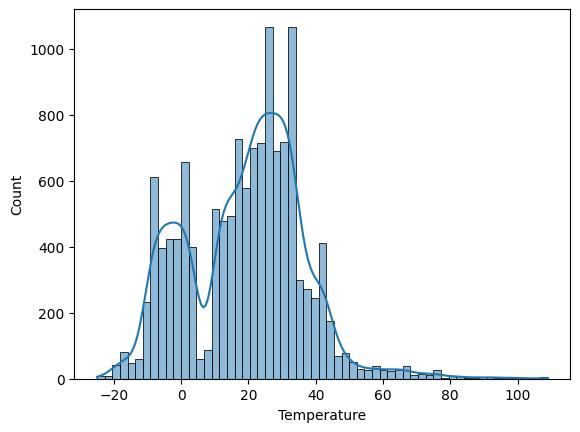

In [57]:
sns.histplot(weather_data['Temperature'], kde=True)


In [58]:
outliers_cols=["Wind Speed","Visibility (km)","UV Index"]
def clip_outliers_iqr(df, columns):
    df_copy = df.copy()
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_copy[col] = df_copy[col].clip(lower=lower_bound, upper=upper_bound)
    return df_copy

In [59]:
df_clean=clip_outliers_iqr(weather_data,outliers_cols)

In [60]:
df_clean.skew(numeric_only=True)

Temperature             0.221741
Humidity               -0.401614
Wind Speed              0.677507
Precipitation (%)      -0.152457
Atmospheric Pressure   -0.293899
UV Index                0.900010
Visibility (km)         0.724154
dtype: float64

In [61]:
df_clean['Wind Speed'] = np.sqrt(df_clean['Wind Speed'])
df_clean['UV Index'] = np.log1p(df_clean['UV Index'])
df_clean['Visibility (km)'] = np.log1p(df_clean['Visibility (km)'])

In [62]:
df_clean.skew(numeric_only=True)

Temperature             0.221741
Humidity               -0.401614
Wind Speed             -0.234465
Precipitation (%)      -0.152457
Atmospheric Pressure   -0.293899
UV Index               -0.047558
Visibility (km)        -0.386093
dtype: float64

In [63]:
df_clean[['Wind Speed', 'UV Index', 'Visibility (km)']].skew()

Wind Speed        -0.234465
UV Index          -0.047558
Visibility (km)   -0.386093
dtype: float64

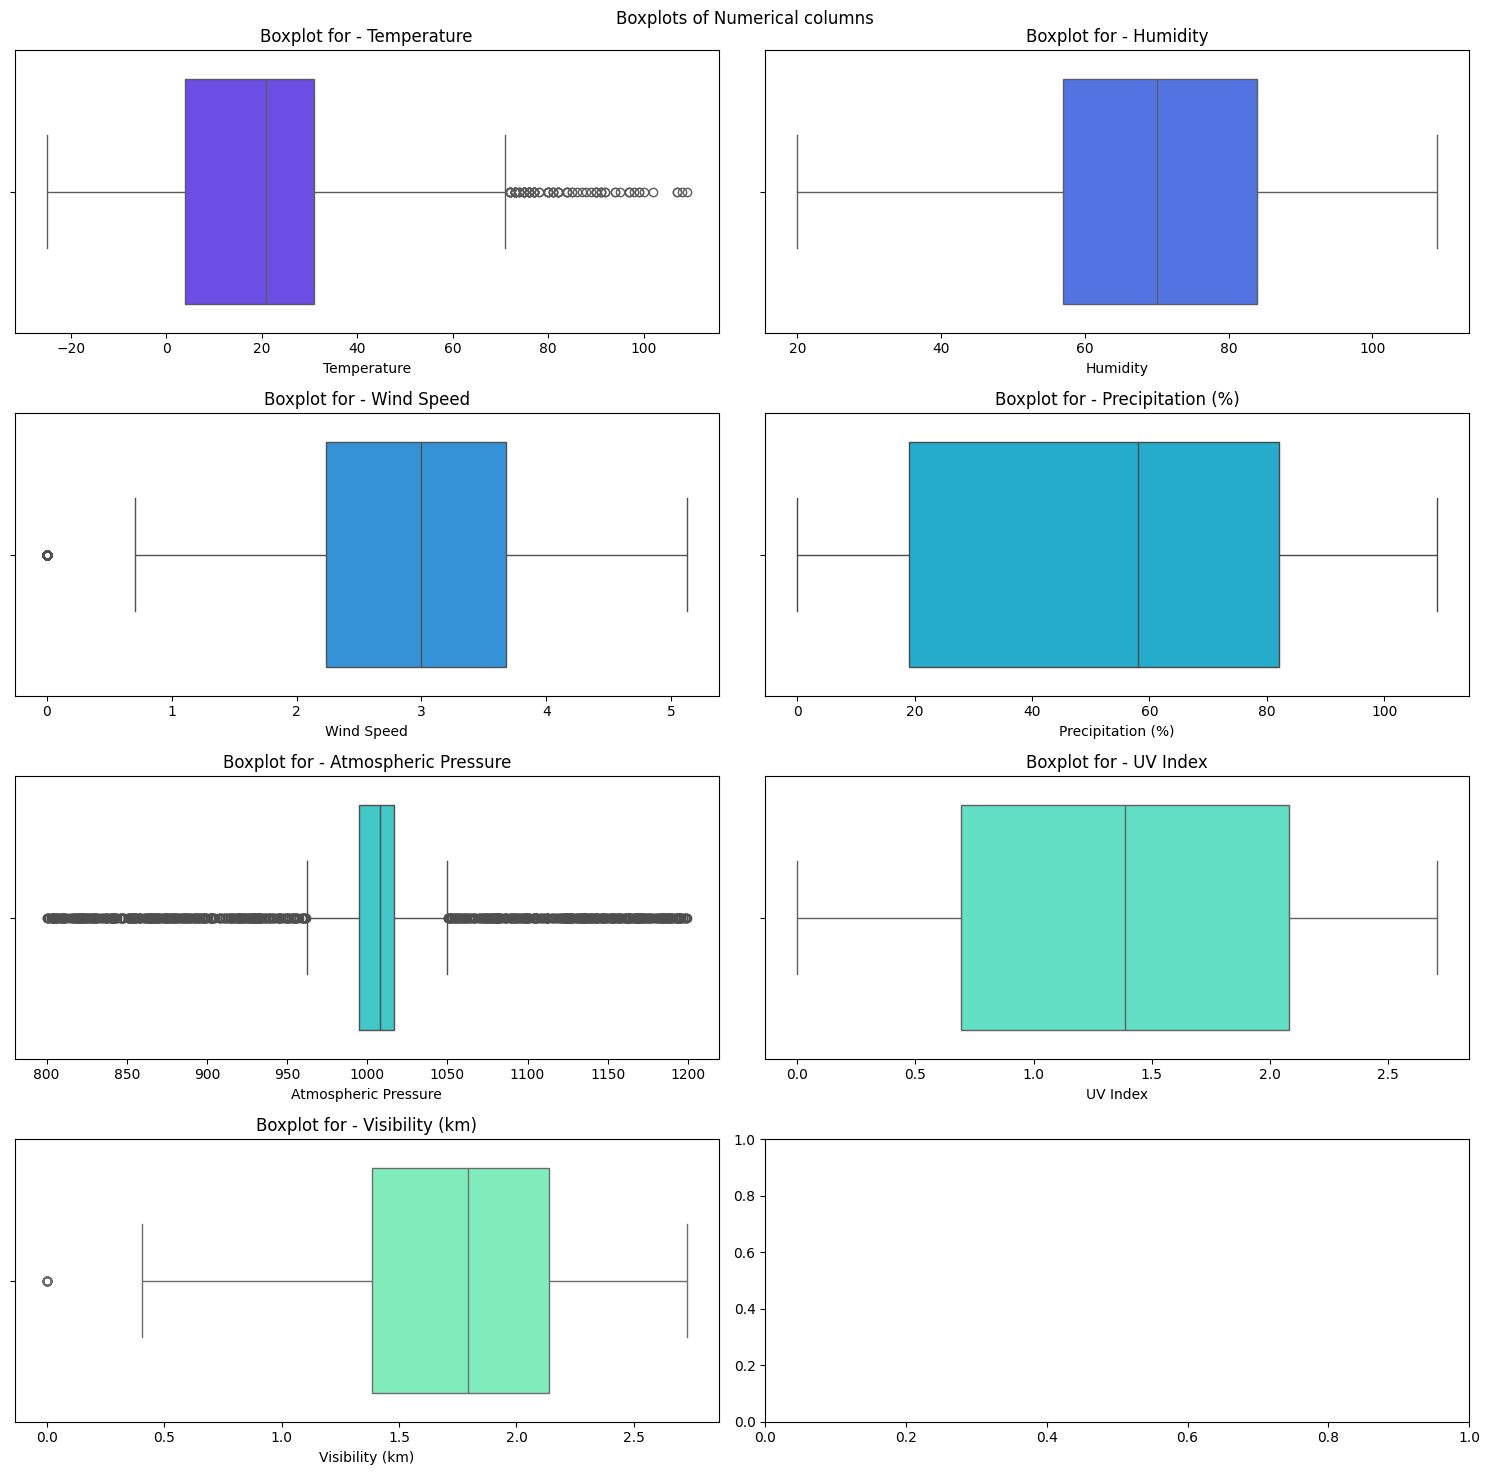

In [64]:
num_cols = df_clean.select_dtypes(include="number").columns
fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (15,15))
pos = axs.flatten() 

for i in range(len(num_cols)): 
    sns.boxplot(data=df_clean, x = num_cols[i], ax = pos[i], color=sns.color_palette("rainbow", 14)[i])
    pos[i].set_title(f"Boxplot for - {num_cols[i]}")

plt.suptitle("Boxplots of Numerical columns")
plt.tight_layout()
plt.show();

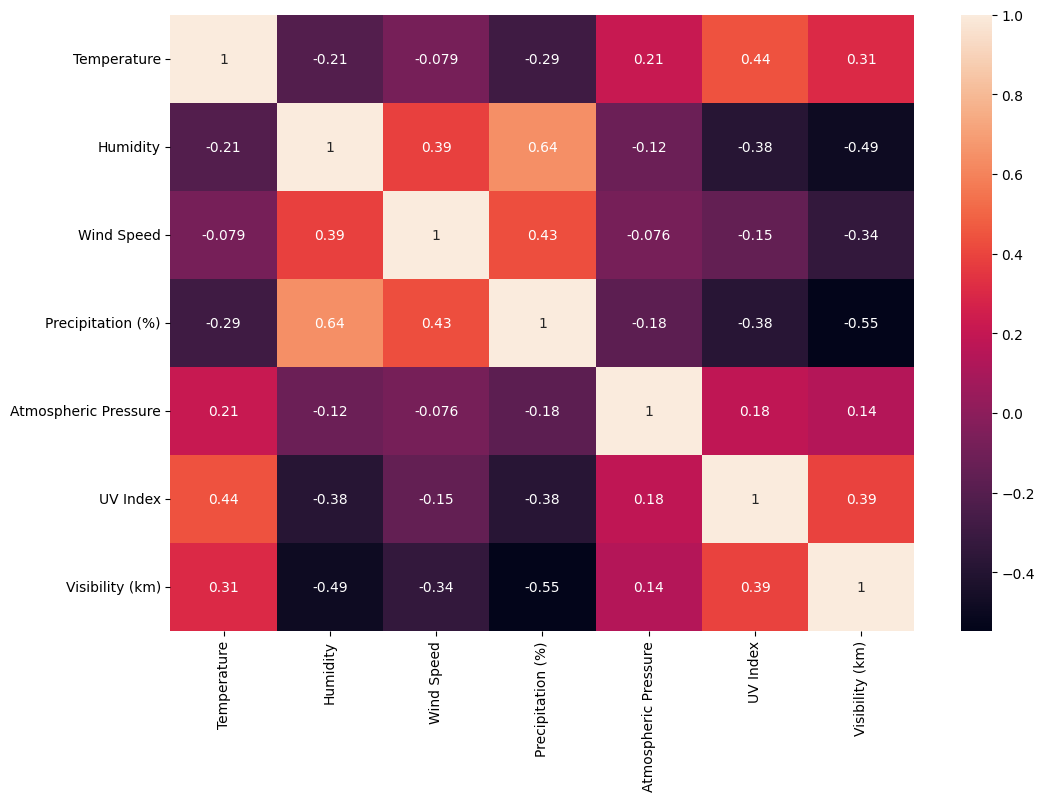

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True)
plt.show();

In [66]:
df_clean.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

#### Splitting the dataset into X(Feature Variable) and Y(Class Variable)

In [68]:
X = df_clean.iloc[:,:-1]
y = df_clean.iloc[:,-1]

In [69]:
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,3.082207,82.0,partly cloudy,1010.82,1.098612,Winter,1.504077,inland
1,39.0,96,2.915476,71.0,partly cloudy,1011.43,2.079442,Spring,2.397895,inland
2,30.0,64,2.645751,16.0,clear,1018.72,1.791759,Spring,1.871802,mountain
3,38.0,83,1.224745,82.0,clear,1026.25,2.079442,Spring,0.693147,coastal
4,27.0,74,4.123106,66.0,overcast,990.67,0.693147,Winter,1.252763,mountain
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,3.807887,71.0,overcast,1003.15,0.693147,Summer,0.693147,mountain
13196,-1.0,76,1.870829,23.0,cloudy,1067.23,0.693147,Winter,1.945910,coastal
13197,30.0,77,2.345208,28.0,overcast,1012.69,1.386294,Autumn,2.302585,coastal
13198,3.0,76,3.162278,94.0,overcast,984.27,0.000000,Winter,1.098612,inland


In [70]:
y

0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather Type, Length: 13200, dtype: object

### Apply preprocessing

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [73]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10560, 10), (2640, 10), (10560,), (2640,))

Only 3 features are categorical converting it into Numerical Format.

Season, Location  --> One Hot Encoding


Weather Type --> Label Encoding



In [75]:
# ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
# categorical_cols = ['Season', 'Location']
# X_train_cat = ohe.fit_transform(df_clean[categorical_cols])


In [76]:
categorical_cols = ['Season', 'Location']
ohe_cat = OneHotEncoder(drop='first', sparse=False, dtype=int)

X_train_cat = ohe_cat.fit_transform(X_train[categorical_cols])
X_test_cat = ohe_cat.transform(X_test[categorical_cols])

X_train_cat_df = pd.DataFrame(X_train_cat,
                              columns=ohe_cat.get_feature_names_out(categorical_cols),
                              index=X_train.index)

X_test_cat_df = pd.DataFrame(X_test_cat,
                             columns=ohe_cat.get_feature_names_out(categorical_cols),
                             index=X_test.index)

In [77]:
cloud_ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_cloud = cloud_ohe.fit_transform(X_train[['Cloud Cover']])
X_test_cloud = cloud_ohe.transform(X_test[['Cloud Cover']])

X_train_cloud_df = pd.DataFrame(X_train_cloud,
                                columns=cloud_ohe.get_feature_names_out(['Cloud Cover']),
                                index=X_train.index)

X_test_cloud_df = pd.DataFrame(X_test_cloud,
                               columns=cloud_ohe.get_feature_names_out(['Cloud Cover']),
                               index=X_test.index)


In [78]:
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                  'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]


X_train_final = pd.concat([X_train_num, X_train_cloud_df, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cloud_df, X_test_cat_df], axis=1)

In [79]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [80]:
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nEncoded Target Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

X_train_final shape: (10560, 16)
X_test_final shape: (2640, 16)
y_train shape: (10560,)
y_test shape: (2640,)

Encoded Target Mapping: {'Cloudy': 0, 'Rainy': 1, 'Snowy': 2, 'Sunny': 3}


In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

In [82]:
from collections import Counter
Counter(y_test)
Counter(y_train)

Counter({1: 660, 0: 660, 3: 660, 2: 660})

Counter({2: 2640, 3: 2640, 1: 2640, 0: 2640})

In [83]:
X_test_final

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
10788,26.0,72,3.000000,69.0,996.40,1.386294,1.609438,0.0,0.0,0.0,1.0,0,0,1,1,0
10052,31.0,71,3.605551,46.0,1005.38,1.386294,1.871802,0.0,0.0,0.0,1.0,0,0,1,0,0
7071,38.0,51,0.707107,1.0,1016.26,2.484907,1.791759,1.0,0.0,0.0,0.0,0,1,0,1,0
9156,17.0,82,4.062019,68.0,1005.12,0.000000,1.098612,0.0,0.0,1.0,0.0,0,0,1,1,0
3837,46.0,102,2.828427,105.0,1016.57,1.609438,2.442347,0.0,0.0,0.0,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,31.0,35,1.870829,1.0,1021.01,2.197225,2.014903,1.0,0.0,0.0,0.0,0,0,0,1,0
1982,32.0,51,1.414214,7.0,1019.44,2.484907,2.197225,0.0,0.0,0.0,1.0,0,1,0,0,1
11235,12.0,73,3.535534,93.0,1001.51,1.098612,1.704748,0.0,0.0,1.0,0.0,0,0,0,0,0
8886,30.0,81,3.240370,75.0,1009.64,0.000000,1.609438,0.0,0.0,1.0,0.0,0,0,0,0,1


In [84]:
df_clean['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [85]:
df_clean['Season'].value_counts()

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [86]:
df_clean['Location'].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

In [87]:
np.sqrt((X_train_scaled.shape[0]/3))

59.329587896765304

## Grid Sampler

In [268]:
def objective(trial):
    # Suggest hyperparameters
    k = trial.suggest_int('k', 30, 70)
    w = trial.suggest_categorical('w', ['uniform', 'distance'])
    # algo = trial.suggest_categorical('algo', ['kd_tree'])

    # Define model
    knn = KNeighborsClassifier(n_neighbors=k, weights=w)

    # Perform cross-validation
    values = cross_validate(knn, X_train_scaled, y_train, cv=3, scoring='accuracy', return_train_score=True)
    cv_acc = values['test_score'].mean()
    train_acc = values['train_score'].mean()

    # Set additional trial attributes
    trial.set_user_attr('train_acc', train_acc)
    # trial.set_user_attr('algorithm', algo)

    return cv_acc


In [270]:
space = {
    "k": range(30,70), 
    "w": ["uniform", "distance"],
    # "algo": ['kd_tree']
}

In [272]:
study=optuna.create_study(direction="maximize",sampler=GridSampler(search_space=space))

[I 2025-06-16 19:56:15,869] A new study created in memory with name: no-name-db745da0-7fa1-43bf-beab-27cdc2d960ab


In [274]:
study.optimize(objective)

[I 2025-06-16 19:56:17,016] Trial 0 finished with value: 0.8628787878787878 and parameters: {'k': 55, 'w': 'uniform'}. Best is trial 0 with value: 0.8628787878787878.
[I 2025-06-16 19:56:17,538] Trial 1 finished with value: 0.8781249999999999 and parameters: {'k': 43, 'w': 'distance'}. Best is trial 1 with value: 0.8781249999999999.
[I 2025-06-16 19:56:18,046] Trial 2 finished with value: 0.8684659090909091 and parameters: {'k': 45, 'w': 'uniform'}. Best is trial 1 with value: 0.8781249999999999.
[I 2025-06-16 19:56:18,739] Trial 3 finished with value: 0.8694128787878787 and parameters: {'k': 68, 'w': 'distance'}. Best is trial 1 with value: 0.8781249999999999.
[I 2025-06-16 19:56:19,341] Trial 4 finished with value: 0.8742424242424242 and parameters: {'k': 52, 'w': 'distance'}. Best is trial 1 with value: 0.8781249999999999.
[I 2025-06-16 19:56:19,992] Trial 5 finished with value: 0.8699810606060606 and parameters: {'k': 65, 'w': 'distance'}. Best is trial 1 with value: 0.878124999999

In [276]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_k,params_w,user_attrs_train_acc,system_attrs_grid_id,system_attrs_search_space,state
0,0,0.862879,2025-06-16 19:56:16.429255,2025-06-16 19:56:17.016794,0 days 00:00:00.587539,55,uniform,0.868703,0,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE
1,1,0.878125,2025-06-16 19:56:17.016794,2025-06-16 19:56:17.530209,0 days 00:00:00.513415,43,distance,1.000000,1,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE
2,2,0.868466,2025-06-16 19:56:17.538356,2025-06-16 19:56:18.046126,0 days 00:00:00.507770,45,uniform,0.876089,2,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE
3,3,0.869413,2025-06-16 19:56:18.046126,2025-06-16 19:56:18.739082,0 days 00:00:00.692956,68,distance,1.000000,3,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE
4,4,0.874242,2025-06-16 19:56:18.739082,2025-06-16 19:56:19.341927,0 days 00:00:00.602845,52,distance,1.000000,4,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...
75,75,0.856061,2025-06-16 19:56:58.583138,2025-06-16 19:56:59.287193,0 days 00:00:00.704055,68,uniform,0.859138,75,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE
76,76,0.870644,2025-06-16 19:56:59.287193,2025-06-16 19:57:00.032447,0 days 00:00:00.745254,63,distance,1.000000,76,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE
77,77,0.858996,2025-06-16 19:57:00.032447,2025-06-16 19:57:00.705087,0 days 00:00:00.672640,62,uniform,0.862595,77,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE
78,78,0.874053,2025-06-16 19:57:00.705087,2025-06-16 19:57:01.396859,0 days 00:00:00.691772,53,distance,1.000000,78,"{'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,...",COMPLETE


In [278]:
study.best_trial

FrozenTrial(number=16, state=1, values=[0.884375], datetime_start=datetime.datetime(2025, 6, 16, 19, 56, 25, 869580), datetime_complete=datetime.datetime(2025, 6, 16, 19, 56, 26, 333337), params={'k': 31, 'w': 'distance'}, user_attrs={'train_acc': 1.0}, system_attrs={'search_space': {'k': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 'w': ['uniform', 'distance']}, 'grid_id': 16}, intermediate_values={}, distributions={'k': IntDistribution(high=70, log=False, low=30, step=1), 'w': CategoricalDistribution(choices=('uniform', 'distance'))}, trial_id=16, value=None)

In [280]:
best = study.best_trial

print("Best Accuracy Score:", best.value)
print("Best Hyperparameters:", best.params)
print("Training Accuracy:", best.user_attrs['train_acc'])
print("Trial Number:", best.number)


Best Accuracy Score: 0.884375
Best Hyperparameters: {'k': 31, 'w': 'distance'}
Training Accuracy: 1.0
Trial Number: 16


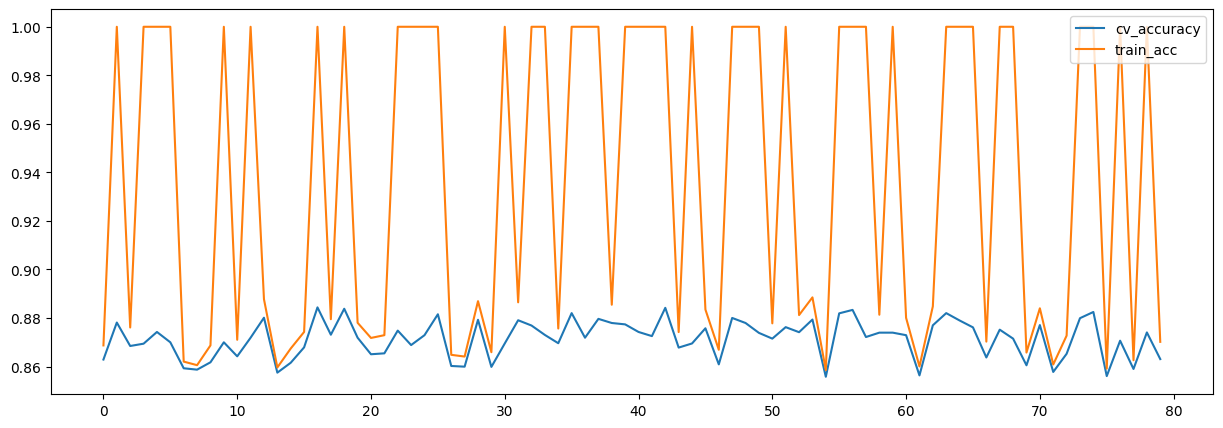

In [282]:
plt.figure(figsize=(15,5))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"],label="cv_accuracy")
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_acc"],label="train_acc")
plt.legend(loc='upper right')
plt.show();

In [284]:
study.best_value

0.884375

In [286]:
study.best_params

{'k': 31, 'w': 'distance'}

In [302]:
cross_validate(knn, X_train_scaled, y_train, cv=3, scoring='accuracy', return_train_score=True)

{'fit_time': array([0.00401211, 0.        , 0.0081532 ]),
 'score_time': array([0.08748078, 0.08149576, 0.07599568]),
 'test_score': array([0.88267045, 0.88778409, 0.88267045]),
 'train_score': array([1., 1., 1.])}

In [288]:
knn=KNeighborsClassifier(n_neighbors=31,weights='distance')
model = knn.fit(X_train_scaled, y_train) 
y_pred = model.predict(X_test_scaled)    
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8890151515151515


In [290]:
confusion_matrix(y_test,y_pred)

array([[580,  66,   9,   5],
       [ 37, 586,  30,   7],
       [ 34,  12, 599,  15],
       [ 51,  20,   7, 582]], dtype=int64)

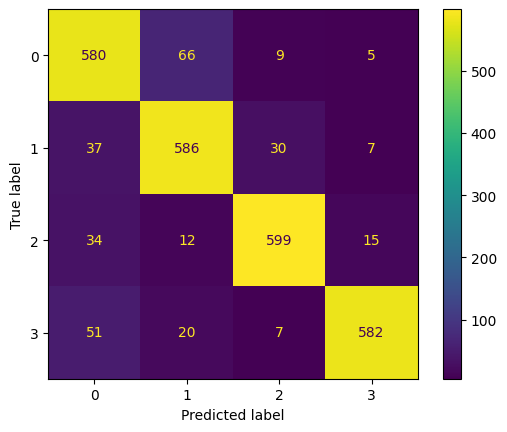

In [292]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
cm.plot()
plt.show();

In [294]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       660
           1       0.86      0.89      0.87       660
           2       0.93      0.91      0.92       660
           3       0.96      0.88      0.92       660

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640



In [296]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy="uniform")
dc.fit(X_train_scaled,y_train)
dum_pre = dc.predict_proba(X_test_scaled)
log_loss(y_test,dum_pre)

DummyClassifier(strategy='uniform')

1.3862943611198906

In [298]:
# log_loss value for our model
knn_pre = knn.predict_proba(X_test_scaled)
log_loss(y_test,knn_pre)

0.5190267171799015

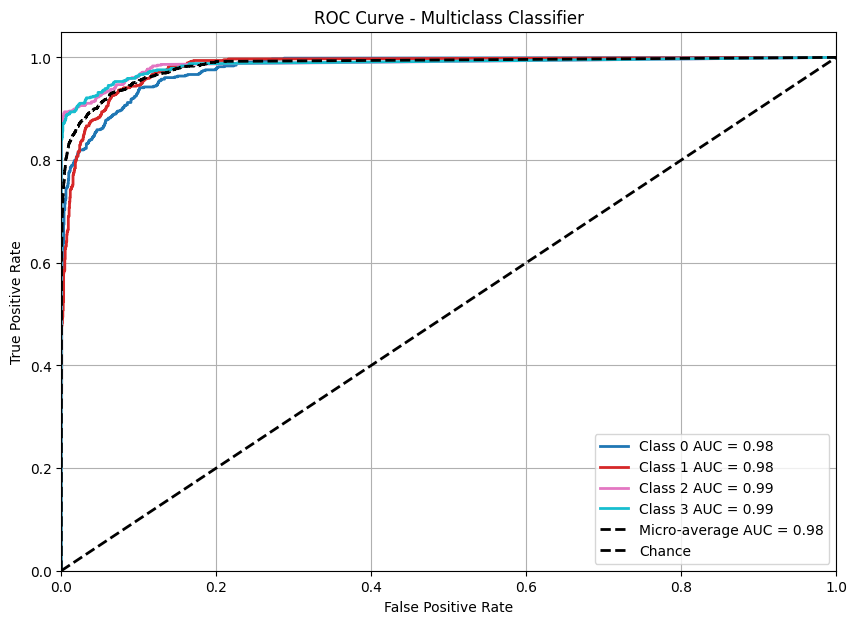

In [312]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Predict probabilities
y_score = model.predict_proba(X_test_scaled)

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
roc_auc["macro"] = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")

# ✅ Dynamically generate enough colors
colors = plt.cm.get_cmap('tab10', n_classes)

# Plot
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f"Class {i} AUC = {roc_auc[i]:.2f}")

plt.plot(fpr["micro"], tpr["micro"], color='black', linestyle='--', lw=2,
         label=f"Micro-average AUC = {roc_auc['micro']:.2f}")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show();

## Model Deployment

In [117]:
import pickle
with open("ohe_cat.pkl","wb") as f:
    pickle.dump(ohe_cat,f)

with open("cloud_ohe.pkl","wb") as f:
    pickle.dump(cloud_ohe,f)

with open("le.pkl","wb") as f:
    pickle.dump(le,f)

with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)


with open("knn_model.pkl","wb") as f:
    pickle.dump(knn,f)